In [2]:
# discription: this program uses an artificial recurrent neural network 
#              called lstm to predict the closing stock price of a corporation(tesla) using past years stock price.
%pip install pandas_datareader
%pip install scikit-learn




Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install keras


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#import the libraries 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [7]:
# Check the version of pandas_datareader
import pandas_datareader as pdr
print(pdr.__version__)


0.10.0


In [8]:
%pip install alpha_vantage


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Example of fetching data from Alpha Vantage
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = ts.get_daily(symbol='TSLA', outputsize='full')
print(data)


            1. open   2. high    3. low  4. close    5. volume
date                                                          
2024-05-02   182.86  184.6000  176.0200    180.01   89148041.0
2024-05-01   182.00  185.8600  179.0100    179.99   92829719.0
2024-04-30   186.98  190.9500  182.8401    183.28  127031787.0
2024-04-29   188.42  198.8700  184.5400    194.05  243869678.0
2024-04-26   168.85  172.1200  166.3700    168.29  109815725.0
...             ...       ...       ...       ...          ...
2010-07-06    20.00   20.0000   15.8300     16.11    6866900.0
2010-07-02    23.00   23.1000   18.7100     19.20    5139800.0
2010-07-01    25.00   25.9200   20.2700     21.96    8218800.0
2010-06-30    25.79   30.4192   23.3000     23.83   17187100.0
2010-06-29    19.00   25.0000   17.5400     23.89   18766300.0

[3485 rows x 5 columns]


In [10]:
data.to_csv('TSLA.csv')

In [11]:
# Initialize TimeSeries with your API key
ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')

# Get daily stock data for TSLA
data, meta_data = ts.get_daily(symbol='TSLA', outputsize='full')

# Convert the fetched data into a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

            1. open   2. high    3. low  4. close    5. volume
date                                                          
2024-05-02   182.86  184.6000  176.0200    180.01   89148041.0
2024-05-01   182.00  185.8600  179.0100    179.99   92829719.0
2024-04-30   186.98  190.9500  182.8401    183.28  127031787.0
2024-04-29   188.42  198.8700  184.5400    194.05  243869678.0
2024-04-26   168.85  172.1200  166.3700    168.29  109815725.0
...             ...       ...       ...       ...          ...
2010-07-06    20.00   20.0000   15.8300     16.11    6866900.0
2010-07-02    23.00   23.1000   18.7100     19.20    5139800.0
2010-07-01    25.00   25.9200   20.2700     21.96    8218800.0
2010-06-30    25.79   30.4192   23.3000     23.83   17187100.0
2010-06-29    19.00   25.0000   17.5400     23.89   18766300.0

[3485 rows x 5 columns]


In [12]:
flipped_df = df[::-1].reset_index(drop=True)
flipped_df


,1. open,2. high,3. low,4. close,5. volume
0,19.00,25.0000,17.5400,23.89,18766300.0
1,25.79,30.4192,23.3000,23.83,17187100.0
2,25.00,25.9200,20.2700,21.96,8218800.0
3,23.00,23.1000,18.7100,19.20,5139800.0
4,20.00,20.0000,15.8300,16.11,6866900.0
...,...,...,...,...,...
3480,168.85,172.1200,166.3700,168.29,109815725.0
3481,188.42,198.8700,184.5400,194.05,243869678.0
3482,186.98,190.9500,182.8401,183.28,127031787.0
3483,182.00,185.8600,179.0100,179.99,92829719.0


In [13]:
#get the number of rows and columns in the data set 
flipped_df.shape

(3485, 5)

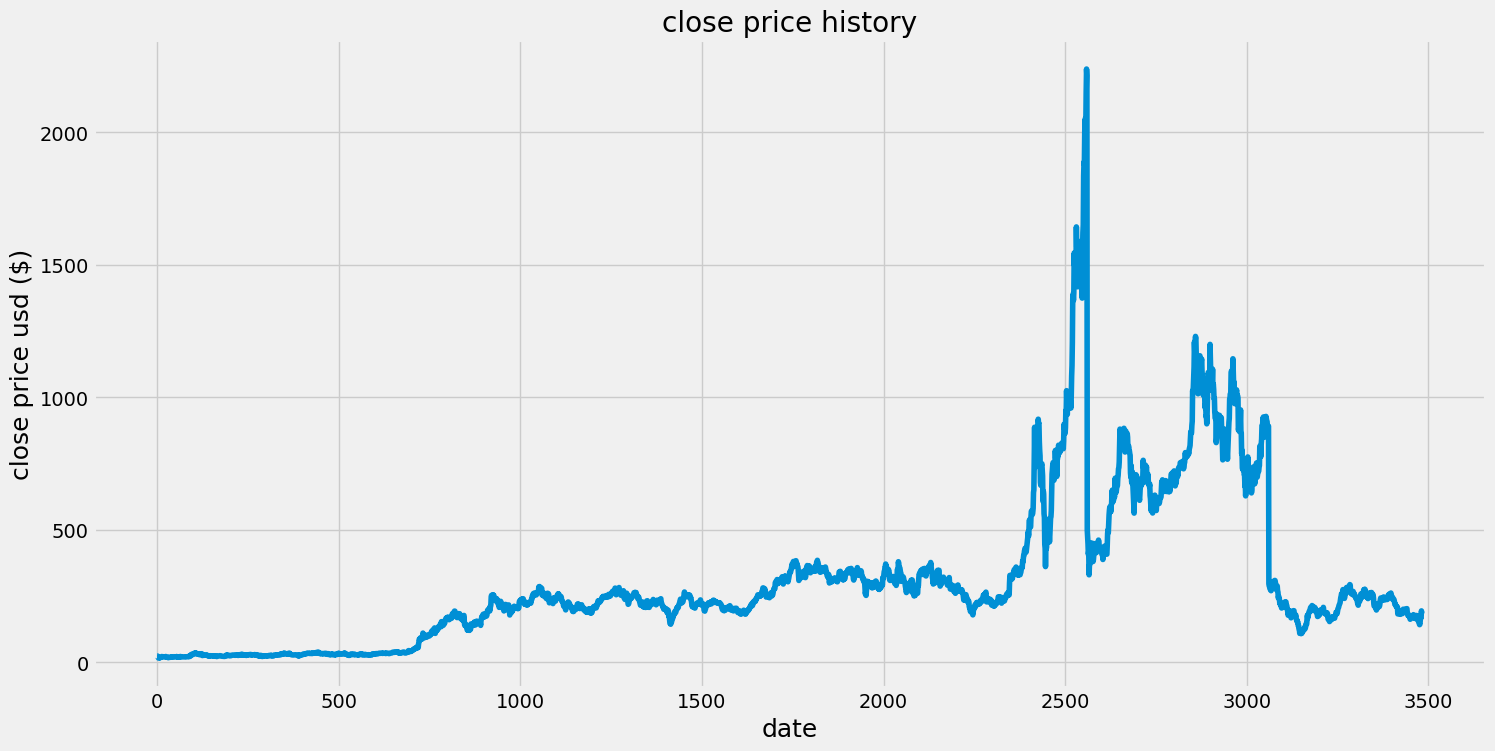

In [14]:
#visualizing closing price history 
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(flipped_df['4. close'])
plt.xlabel('date',fontsize=18)
plt.ylabel('close price usd ($)',fontsize=18)
plt.show()

In [15]:
#create a new dataframe with only 'close' column
data = flipped_df.filter(['4. close'])
#convert the dataframe to a numpy array
dataset= data.values
#get the number of row to train the model on 
training_data_len = math.ceil( len(dataset)* .8)

training_data_len


2788

In [16]:
#scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00363931],
       [0.00361232],
       [0.00277109],
       ...,
       [0.07534133],
       [0.07386131],
       [0.07387031]])

In [17]:
#create the train data set 
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data set 
x_train = []
y_train = []

for i in range(500, len(train_data)):
    x_train.append(train_data[i-500:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 501:
        print(x_train)
        print(y_train)
        print()
    


[array([0.00363931, 0.00361232, 0.00277109, 0.0015295 , 0.00013945,
       0.        , 0.00074676, 0.00071976, 0.00056232, 0.00105266,
       0.0018174 , 0.0018399 , 0.00217729, 0.0027486 , 0.00202434,
       0.00198835, 0.00233923, 0.00246969, 0.00231674, 0.0021368 ,
       0.00221328, 0.00204683, 0.00186239, 0.00230325, 0.00276659,
       0.0024562 , 0.00209181, 0.00170494, 0.00170944, 0.00145302,
       0.00094469, 0.00080973, 0.00113363, 0.00134056, 0.00150701,
       0.00133606, 0.00134506, 0.00148451, 0.00194786, 0.0015295 ,
       0.0018444 , 0.00177692, 0.00175443, 0.0018309 , 0.00165546,
       0.00209181, 0.00236623, 0.00236173, 0.0021323 , 0.00229425,
       0.00220878, 0.00196586, 0.00221328, 0.00239322, 0.00278009,
       0.00231224, 0.00199285, 0.00236398, 0.00223577, 0.0018309 ,
       0.00169145, 0.00193437, 0.0021278 , 0.00251917, 0.00278009,
       0.00207157, 0.00215929, 0.00233474, 0.00239322, 0.00209631,
       0.00208282, 0.00208282, 0.00199735, 0.00199735, 0.0021

In [18]:
#convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
#reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],  1))
x_train.shape

(2288, 500, 1)

In [20]:
#build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\Malavi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
#compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
#train the model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

2288/2288 ━━━━━━━━━━━━━━━━━━━━ 321s 139ms/step - loss: 0.0025


In [23]:
#creating the testing data set 
#createa new array containing scaled values from index 2721 to 3221
test_data = scaled_data[training_data_len - 500: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(500, len(test_data)):
    x_test.append(test_data[i-500:i, 0])


In [24]:
#convert data into numpy array 
x_test = np.array(x_test)

In [25]:
#reshape the data for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [26]:
#get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


In [37]:
# Calculate Mean Squared Error (MSE)
mse = np.mean((predictions - y_test) ** 2)
mse

2750.0517607782826

In [27]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.9059864367097847

In [38]:
#calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(predictions - y_test))
mae

34.90581320895355

C:\Users\Malavi\AppData\Local\Temp\ipykernel_10144\2773688615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


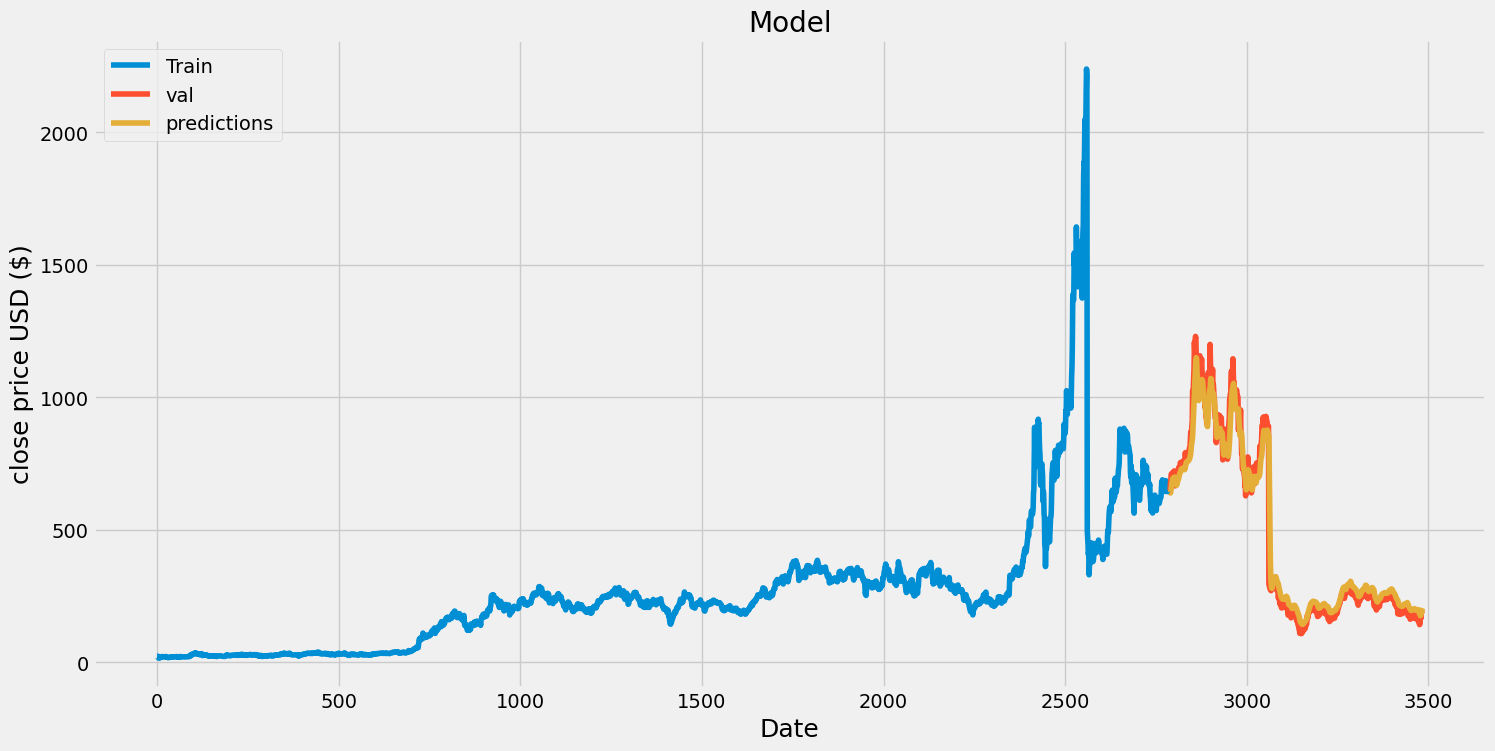

In [29]:
#plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($)', fontsize=18)
plt.plot(train['4. close'])
plt.plot(valid[['4. close','Predictions']])
plt.legend(['Train','val','predictions'], loc='upper left')
plt.show()

In [30]:
#show the valid and predicted prices 
valid 

,4. close,Predictions
2788,644.78,640.783081
2789,646.98,639.827026
2790,677.35,638.889282
2791,687.20,644.204529
2792,709.67,652.754395
...,...,...
3480,168.29,181.709274
3481,194.05,186.127426
3482,183.28,194.391159
3483,179.99,200.746155


In [31]:
#get the quote
ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = ts.get_daily(symbol='TSLA', outputsize='full')
print(data)



            1. open   2. high    3. low  4. close    5. volume
date                                                          
2024-05-02   182.86  184.6000  176.0200    180.01   89148041.0
2024-05-01   182.00  185.8600  179.0100    179.99   92829719.0
2024-04-30   186.98  190.9500  182.8401    183.28  127031787.0
2024-04-29   188.42  198.8700  184.5400    194.05  243869678.0
2024-04-26   168.85  172.1200  166.3700    168.29  109815725.0
...             ...       ...       ...       ...          ...
2010-07-06    20.00   20.0000   15.8300     16.11    6866900.0
2010-07-02    23.00   23.1000   18.7100     19.20    5139800.0
2010-07-01    25.00   25.9200   20.2700     21.96    8218800.0
2010-06-30    25.79   30.4192   23.3000     23.83   17187100.0
2010-06-29    19.00   25.0000   17.5400     23.89   18766300.0

[3485 rows x 5 columns]


In [32]:
# Initialize TimeSeries with your API key
ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')

# Get daily stock data for TSLA
data, meta_data = ts.get_daily(symbol='TSLA', outputsize='full')

# Convert the fetched data into a DataFrame
df3 = pd.DataFrame(data)

# Print the DataFrame
print(df3)

            1. open   2. high    3. low  4. close    5. volume
date                                                          
2024-05-02   182.86  184.6000  176.0200    180.01   89148041.0
2024-05-01   182.00  185.8600  179.0100    179.99   92829719.0
2024-04-30   186.98  190.9500  182.8401    183.28  127031787.0
2024-04-29   188.42  198.8700  184.5400    194.05  243869678.0
2024-04-26   168.85  172.1200  166.3700    168.29  109815725.0
...             ...       ...       ...       ...          ...
2010-07-06    20.00   20.0000   15.8300     16.11    6866900.0
2010-07-02    23.00   23.1000   18.7100     19.20    5139800.0
2010-07-01    25.00   25.9200   20.2700     21.96    8218800.0
2010-06-30    25.79   30.4192   23.3000     23.83   17187100.0
2010-06-29    19.00   25.0000   17.5400     23.89   18766300.0

[3485 rows x 5 columns]


In [33]:
flipped_df2 = df3[::-1].reset_index(drop=True)
flipped_df2

,1. open,2. high,3. low,4. close,5. volume
0,19.00,25.0000,17.5400,23.89,18766300.0
1,25.79,30.4192,23.3000,23.83,17187100.0
2,25.00,25.9200,20.2700,21.96,8218800.0
3,23.00,23.1000,18.7100,19.20,5139800.0
4,20.00,20.0000,15.8300,16.11,6866900.0
...,...,...,...,...,...
3480,168.85,172.1200,166.3700,168.29,109815725.0
3481,188.42,198.8700,184.5400,194.05,243869678.0
3482,186.98,190.9500,182.8401,183.28,127031787.0
3483,182.00,185.8600,179.0100,179.99,92829719.0


In [34]:
# Extract the 'close' column
close_column = flipped_df2['4. close']

In [35]:
# Create a new DataFrame with the filtered 'close' column
new_df = pd.DataFrame({'close': close_column})
print(new_df)

       close
0      23.89
1      23.83
2      21.96
3      19.20
4      16.11
...      ...
3480  168.29
3481  194.05
3482  183.28
3483  179.99
3484  180.01

[3485 rows x 1 columns]


In [36]:
last_60_day = new_df[-60:].values
last_60_day_scaled = scaler.transform(last_60_day)
#create emplty list 
x_test = []
x_test.append(last_60_day_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
pred_price= model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
[[206.35516]]
